### Technical test in Data Science

### Candidate: Oğuzhan Tanrıkulu

### imports: 
### For handling with data pandas and numpy, for visualization matplotlib, for dealing with dates datetime and for handling z-score scipy.stats libraries are imported.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import zscore,stats
from sklearn.model_selection import train_test_split

# Data Loading

In [2]:
df1 = pd.read_json("../input/nytaxi/data-sample_data-nyctaxi-trips-2009-json_corrigido.json", lines=True)
df2 = pd.read_json("../input/nytaxi/data-sample_data-nyctaxi-trips-2010-json_corrigido.json", lines=True)
df3 = pd.read_json("../input/nytaxi/data-sample_data-nyctaxi-trips-2011-json_corrigido.json", lines=True)
df4 = pd.read_json("../input/nytaxi/data-sample_data-nyctaxi-trips-2012-json_corrigido.json", lines=True)

In [3]:
df_v = pd.read_csv("../input/nytaxi/data-vendor_lookup-csv.csv")
df_p = pd.read_csv("../input/nytaxi/data-payment_lookup-csv.csv", skiprows = 1)

# Preparing the data and overview
### Combining data in a single dataframe.

In [4]:
df_all=pd.concat([df1,df2,df3,df4])

### Overview of shape, column, and column types in data

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000000 entries, 0 to 999999
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   vendor_id           object 
 1   pickup_datetime     object 
 2   dropoff_datetime    object 
 3   passenger_count     int64  
 4   trip_distance       float64
 5   pickup_longitude    float64
 6   pickup_latitude     float64
 7   rate_code           float64
 8   store_and_fwd_flag  float64
 9   dropoff_longitude   float64
 10  dropoff_latitude    float64
 11  payment_type        object 
 12  fare_amount         float64
 13  surcharge           float64
 14  tip_amount          float64
 15  tolls_amount        float64
 16  total_amount        float64
dtypes: float64(12), int64(1), object(4)
memory usage: 549.3+ MB


### Displaying the first and last 5 rows of data

In [6]:
df_all.head(-5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.80,-74.004114,40.742950,NaN,NaN,-73.994712,40.747950,Cash,5.4,0.0,0.0,0.0,5.4
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.40,-73.996506,40.747784,NaN,NaN,-73.940449,40.792385,Cash,15.4,0.0,0.0,0.0,15.4
2,VTS,2009-01-06T19:30:44.142187+00:00,2009-01-06T19:43:09.908429+00:00,5,1.67,-73.951340,40.752070,NaN,NaN,-73.944535,40.768108,CASH,6.1,1.0,0.0,0.0,7.1
3,VTS,2009-09-24T08:28:09.004451+00:00,2009-09-24T08:41:56.739991+00:00,1,4.13,-74.001117,40.729128,NaN,NaN,-73.958122,40.721812,CASH,12.9,0.5,0.0,0.0,13.4
4,VTS,2009-10-29T05:50:39.214629+00:00,2009-10-29T05:57:22.880174+00:00,1,2.03,-73.976600,40.756873,NaN,NaN,-73.979757,40.776075,CASH,7.7,0.5,0.0,0.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,CMT,2012-10-11T18:53:47.718562+00:00,2012-10-11T19:05:08.562426+00:00,3,1.00,-73.955900,40.772290,NaN,NaN,-73.946428,40.774825,Cash,5.8,0.0,0.0,0.0,5.8
999991,CMT,2012-04-07T06:42:22.954624+00:00,2012-04-07T06:54:16.879611+00:00,1,4.50,-73.999694,40.743613,NaN,NaN,-73.953358,40.788429,Cash,14.6,0.0,0.0,0.0,14.6
999992,CMT,2012-06-26T22:30:29.95888+00:00,2012-06-26T22:43:57.517264+00:00,1,0.60,-73.919672,40.772614,NaN,NaN,-73.925752,40.769802,Cash,4.6,0.0,0.0,0.0,4.6
999993,CMT,2012-10-24T02:13:06.454046+00:00,2012-10-24T02:22:27.586879+00:00,1,1.40,-73.986315,40.686709,NaN,NaN,-73.969958,40.688731,Cash,7.8,0.0,0.0,0.0,7.8


### Overview of Payment lookup data

In [7]:
df_p

,payment_type,payment_lookup
0,Cas,Cash
1,CAS,Cash
2,Cre,Credit
3,CRE,Credit
4,No,No Charge
...,...,...
3283,3267,Foo
3284,3268,Foo
3285,3269,Foo
3286,3270,Foo


### Merging with the main data via 'payment_type' primary key, to use in the future

In [8]:
df_all = pd.merge(df_all, df_p, on='payment_type')

### Overview of Vendor lookup data

In [9]:
df_v

,vendor_id,name,address,city,state,zip,country,contact,current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


### Preparing vendor lookup data to merge with main data by specifying the column names

In [10]:
df_v.columns=['vendor_id','vendor_name','vendor_address','vendor_city','vendor_state','vendor_zip','vendor_country','vendor_contact','vendor_current']

In [11]:
df_v

,vendor_id,vendor_name,vendor_address,vendor_city,vendor_state,vendor_zip,vendor_country,vendor_contact,vendor_current
0,CMT,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,VTS,VeriFone Inc,26 Summit St.,Flushing,NY,11354,USA,admin@vtstaxi.com,Yes
2,DDS,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3,TS,Total Solutions Co,Five Boroughs Taxi Co.,Brooklyn,NY,11229,USA,mgmt@5btc.com,Yes
4,MT,Mega Taxi,4 East Jennings St.,Brooklyn,NY,11228,USA,contact@megataxico.com,No


### Merging with the main data via 'vendor_id' as primary key

In [12]:
df_all = pd.merge(df_all, df_v, on='vendor_id')

In [13]:
df_all.head(-5)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,...,total_amount,payment_lookup,vendor_name,vendor_address,vendor_city,vendor_state,vendor_zip,vendor_country,vendor_contact,vendor_current
0,CMT,2009-04-21T18:51:11.767205+00:00,2009-04-21T18:57:09.433767+00:00,2,0.8,-74.004114,40.742950,NaN,NaN,-73.994712,...,5.40,Cash,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
1,CMT,2009-01-13T07:40:07.639754+00:00,2009-01-13T07:50:36.386011+00:00,1,5.4,-73.996506,40.747784,NaN,NaN,-73.940449,...,15.40,Cash,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
2,CMT,2009-04-22T04:47:09.901958+00:00,2009-04-22T04:55:09.024372+00:00,1,6.0,-73.948288,40.774511,NaN,NaN,-73.997466,...,18.70,Cash,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
3,CMT,2009-09-22T17:43:48.026032+00:00,2009-09-22T17:55:12.903872+00:00,2,0.5,-73.992710,40.743155,NaN,NaN,-74.002378,...,4.90,Cash,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
4,CMT,2009-12-03T19:17:56.658601+00:00,2009-12-03T19:26:59.460155+00:00,1,1.1,-73.990926,40.751590,NaN,NaN,-73.992199,...,5.30,Cash,"Creative Mobile Technologies, LLC",950 4th Road Suite 78,Brooklyn,NY,11210,USA,contactCMT@gmail.com,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999990,DDS,2012-10-23T18:43:52.442129+00:00,2012-10-23T18:50:59.842215+00:00,1,2.1,-73.992602,40.713265,NaN,NaN,-73.990967,...,11.15,Credit,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3999991,DDS,2012-07-18T17:57:01.765602+00:00,2012-07-18T18:07:24.336068+00:00,1,1.8,-73.981326,40.747293,NaN,NaN,-74.000111,...,9.95,Credit,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3999992,DDS,2012-04-01T03:44:55.130181+00:00,2012-04-01T03:58:25.733147+00:00,2,2.1,-73.988314,40.731615,NaN,NaN,-73.991867,...,11.60,Credit,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes
3999993,DDS,2012-05-02T20:46:55.248674+00:00,2012-05-02T20:54:54.621329+00:00,2,0.9,-73.980497,40.783080,NaN,NaN,-73.970666,...,6.95,Credit,"Dependable Driver Service, Inc",8554 North Homestead St.,Bronx,NY,10472,USA,9778896500,Yes


### type of "dropoff_datetime" is converted datetime64 to make it workable

In [14]:
df_all["dropoff_datetime"]=df_all["dropoff_datetime"].astype("datetime64")

### Overview the stats of all data

In [15]:
df_all.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,vendor_zip
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,0.0,248.0,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,1.733573e+00,2.678209e+00,-7.283060e+01,4.012473e+01,NaN,0.0,-7.284804e+01,4.013500e+01,9.629421e+00,1.619385e-01,4.085400e-01,1.235945e-01,1.032687e+01,1.122971e+04
std,1.254536e+00,3.130601e+00,9.122395e+00,5.026362e+00,NaN,0.0,9.050543e+00,4.986513e+00,7.567478e+00,3.083548e-01,1.258632e+00,7.616636e-01,8.503208e+00,2.080030e+02
min,0.000000e+00,0.000000e+00,-8.487835e+01,-9.262000e-03,NaN,0.0,-7.919139e+01,-1.520200e-02,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,1.047200e+04
25%,1.000000e+00,1.000000e+00,-7.399112e+01,4.073639e+01,NaN,0.0,-7.399067e+01,4.073537e+01,5.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+00,1.121000e+04
50%,1.000000e+00,1.700000e+00,-7.398111e+01,4.075453e+01,NaN,0.0,-7.397953e+01,4.075449e+01,7.300000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.800000e+00,1.121000e+04
75%,2.000000e+00,3.000000e+00,-7.396681e+01,4.076844e+01,NaN,0.0,-7.396339e+01,4.076952e+01,1.090000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.140000e+01,1.135400e+04
max,6.000000e+00,4.992000e+01,4.023000e-03,4.792285e+01,NaN,0.0,8.668000e-03,4.793581e+01,2.000000e+02,1.000000e+00,9.823000e+01,2.000000e+01,2.300000e+02,1.135400e+04


# Answer of Question 1

### 1. What is the average distance traveled by trips with a maximum of 2 passengers

### Locating the mean of trip distances where the passenger count is equal or less then 2

In [16]:
avd = df_all[['trip_distance']].where(df_all.passenger_count<=2).mean().iloc[0]

### Result

In [17]:
print("\n\nThe average distance traveled by trips with a maximum of 2 passengers is:\n{}".format(avd))



The average distance traveled by trips with a maximum of 2 passengers is:
2.6625269962035083


# Answer of Question 2

### 2. Which are the 3 biggest vendors based on the total amount of money raised

###  Viewing unique/distinct items to understand the vendors data

In [18]:
df_all.vendor_id.unique()

array(['CMT', 'VTS', 'DDS', 'TS'], dtype=object)

### So if we get sum of total_amount's of the rides by grouping them by the vendor_id we can reach the results sorted

In [19]:
df_all['total_amount'].groupby(df_all.vendor_id).sum().sort_values()[::-1]

vendor_id
CMT    1.954908e+07
VTS    1.904343e+07
DDS    2.714902e+06
TS     4.560000e+01
Name: total_amount, dtype: float64

### Because of the vendor_id and vendor_name are unique in the same way we can see the 3 biggest sum amount of vendors with their names

In [20]:
df_all['total_amount'].groupby(df_all.vendor_name).sum().sort_values()[::-1][:3]

vendor_name
Creative Mobile Technologies, LLC    1.954908e+07
VeriFone Inc                         1.904343e+07
Dependable Driver Service, Inc       2.714902e+06
Name: total_amount, dtype: float64

### If we want to call the id's name information from an external table

In [21]:
vdf = df_all['total_amount'].groupby(df_all.vendor_id).sum().sort_values().reset_index()

In [22]:
pd.merge(vdf[['vendor_id','total_amount']], df_v[['vendor_id','vendor_name']], on='vendor_id')[::-1][:3]

,vendor_id,total_amount,vendor_name
3,CMT,1.954908e+07,"Creative Mobile Technologies, LLC"
2,VTS,1.904343e+07,VeriFone Inc
1,DDS,2.714902e+06,"Dependable Driver Service, Inc"


In [23]:
dfv_xy=pd.merge(vdf[['vendor_id','total_amount']], df_v[['vendor_id','vendor_name']], on='vendor_id')[::-1][:3].iloc[:,[2,1]]

In [24]:
dfv_xy

,vendor_name,total_amount
3,"Creative Mobile Technologies, LLC",1.954908e+07
2,VeriFone Inc,1.904343e+07
1,"Dependable Driver Service, Inc",2.714902e+06


### Also, the three largest companies can be seen on a bar chart.

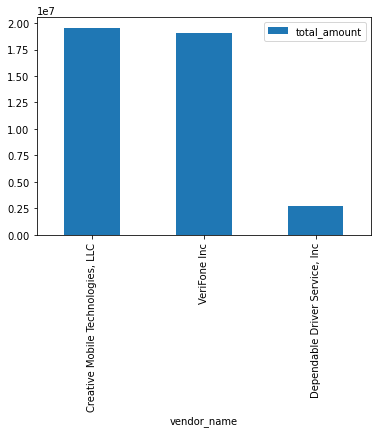

In [25]:
dfv_xy.plot.bar(x='vendor_name', y='total_amount')

# Answer of Question 3

### 3. Make a histogram of the monthly distribution over 4 years of rides paid with cash

### Viewing the distinct values of payment type and payment lookup maches

In [26]:
df_all.payment_type.unique()

array(['Cash', 'Credit', 'No Charge', 'Dispute', 'CASH', 'CREDIT'],
      dtype=object)

In [27]:
df_all.payment_lookup.unique()

array(['Cash', 'Credit', 'No Charge', 'Dispute'], dtype=object)

### So we can use 'Cash' in payment_lookup as key to find cashes only

### Dropoff time is considered ride time

In [28]:
df_all.dropoff_datetime

0         2009-04-21 18:57:09.433767
1         2009-01-13 07:50:36.386011
2         2009-04-22 04:55:09.024372
3         2009-09-22 17:55:12.903872
4         2009-12-03 19:26:59.460155
                     ...            
3999995   2012-01-12 06:35:07.999302
3999996   2009-08-22 14:45:03.951506
3999997   2010-01-28 19:10:06.358666
3999998   2011-10-18 20:27:33.827441
3999999   2012-07-11 10:11:00.242403
Name: dropoff_datetime, Length: 4000000, dtype: datetime64[ns]

In [29]:
df_all["dropoff_datetime"]

0         2009-04-21 18:57:09.433767
1         2009-01-13 07:50:36.386011
2         2009-04-22 04:55:09.024372
3         2009-09-22 17:55:12.903872
4         2009-12-03 19:26:59.460155
                     ...            
3999995   2012-01-12 06:35:07.999302
3999996   2009-08-22 14:45:03.951506
3999997   2010-01-28 19:10:06.358666
3999998   2011-10-18 20:27:33.827441
3999999   2012-07-11 10:11:00.242403
Name: dropoff_datetime, Length: 4000000, dtype: datetime64[ns]

### Rides per month for all payment methods

Text(0, 0.5, 'Number Of Rides')

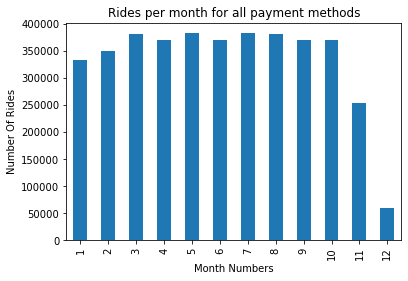

In [30]:
df_all.dropoff_datetime.groupby(df_all["dropoff_datetime"].dt.month).count().plot(kind="bar",title ='Rides per month for all payment methods' )
plt.xlabel("Month Numbers")
plt.ylabel("Number Of Rides")

Text(0, 0.5, 'Number Of Rides')

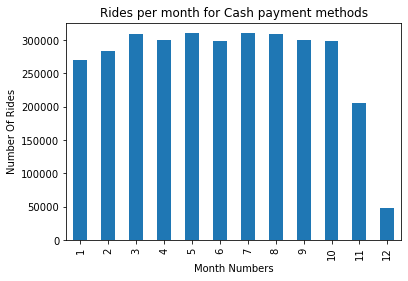

In [31]:
df_all.dropoff_datetime.where(df_all.payment_lookup=='Cash').groupby(df_all["dropoff_datetime"].dt.month).count().plot(kind="bar",title ='Rides per month for Cash payment methods')
plt.xlabel("Month Numbers")
plt.ylabel("Number Of Rides")

Text(0, 0.5, 'Number Of Rides')

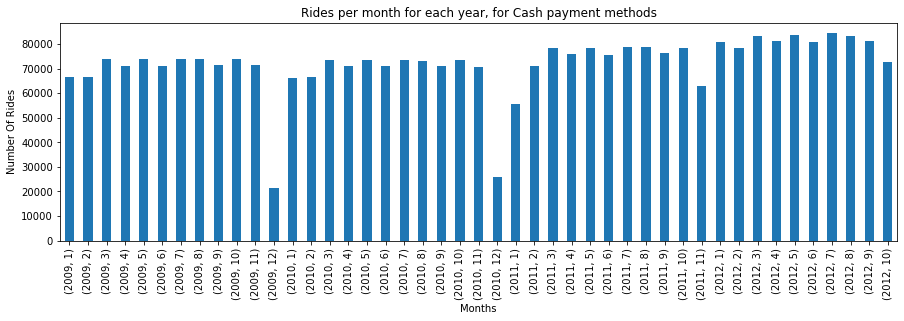

In [32]:
df_all.dropoff_datetime.where(df_all.payment_lookup=='Cash').groupby(by=[(df_all["dropoff_datetime"].dt.year),(df_all["dropoff_datetime"].dt.month)]).count().plot(figsize=(15, 4),kind="bar",title ='Rides per month for each year, for Cash payment methods')
plt.xlabel("Months")
plt.ylabel("Number Of Rides")

# Answer of Question 4

### 4. Make a time series chart computing the number of tips each day for the last 3 months of 2012

### Checking whether the trips that are not tipped are null or 0


In [33]:
df_all.tip_amount.unique()

array([ 0.  ,  1.53,  2.  , ..., 10.1 , 18.35,  9.95])

In [34]:
df_all.tip_amount.isnull().sum()

0

### There is no null values but 0 values for the trips that are not tipped

### Let's see the number of trips that are not tipped

In [35]:
df_all.tip_amount.where(df_all.tip_amount==0).count()

3281576

### And the number of trips that are tipped

In [36]:
df_all.tip_amount.where(df_all.tip_amount!=0).count()

718424

### Number of trips that are tipped in the year 2012

In [37]:
df_all.tip_amount.where((df_all.tip_amount!=0) & (df_all["dropoff_datetime"].dt.year==2012)).count()

179606

### Number of trips that are tipped in the last given three months of the year 2012 

In [38]:
df_all.tip_amount.where((df_all.tip_amount!=0) & (df_all["dropoff_datetime"].dt.year==2012)& (df_all["dropoff_datetime"].dt.month>=(8))).count()

52418

### Let's calculate the last three months of 2012 in given data, instead of manually writing it

In [39]:
months_of_the_year=(df_all["dropoff_datetime"].dt.month).where((df_all["dropoff_datetime"].dt.year==2012)&((df_all["dropoff_datetime"].dt.month)!=np.nan)).unique()

### And that gives us the third-to-last month of 2012 so that we can deal with the months that is and after it.

In [40]:
last3thMonth=sorted(months_of_the_year)[::-1][:3][-1]

### So we can use the third-to-last month for detecting number of tips in 2012 last three months

In [41]:
DaysOfLastThreeMonthsOnCondition=df_all.tip_amount.groupby(df_all["dropoff_datetime"].dt.date.where((df_all.tip_amount!=0) & (df_all["dropoff_datetime"].dt.year==2012)& (df_all["dropoff_datetime"].dt.month>=(last3thMonth)))).count()

### Number of tips each day for the last 3 months of 2012

In [42]:
DaysOfLastThreeMonthsOnCondition

dropoff_datetime
2012-08-01    572
2012-08-02    621
2012-08-03    597
2012-08-04    607
2012-08-05    559
             ... 
2012-10-24    582
2012-10-25    553
2012-10-26    621
2012-10-27    561
2012-10-28      2
Name: tip_amount, Length: 89, dtype: int64

### Final graphs: The number of tips each day for the last 3 months of 2012

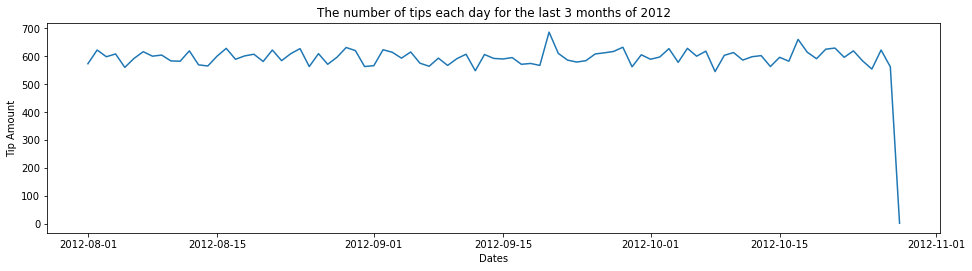

In [43]:
DaysOfLastThreeMonthsOnCondition.plot(figsize=(16, 4), title="The number of tips each day for the last 3 months of 2012")
plt.xticks()
plt.xlabel("Dates")
plt.ylabel("Tip Amount")

plt.subplots_adjust(bottom=0.15)
plt.show()

### To see each day separately as tics, the series of days in the conditions

In [44]:
days=sorted(df_all["dropoff_datetime"].dt.date.loc[(df_all["dropoff_datetime"].dt.year==2012) & (df_all["dropoff_datetime"].dt.month>=8)].unique())

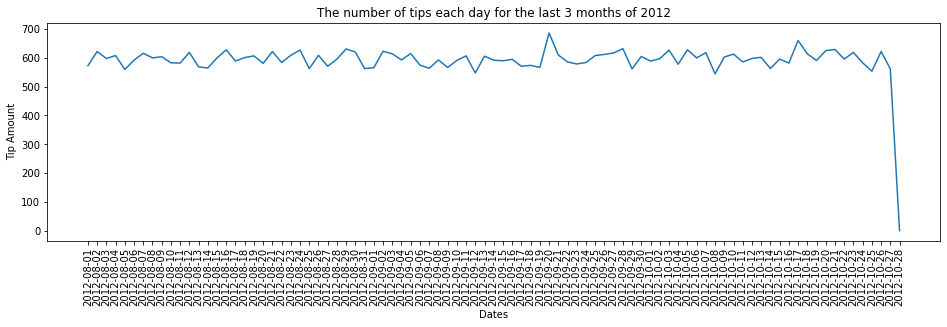

In [45]:
DaysOfLastThreeMonthsOnCondition.plot(figsize=(16, 4), title= "The number of tips each day for the last 3 months of 2012")
plt.xticks(days, rotation='vertical')
plt.xlabel("Dates")
plt.ylabel("Tip Amount")
plt.show()

# Bonus items

# ● What is the average trip time on Saturdays and Sundays;

### the average trip time on Saturdays

In [46]:
df_all[['trip_distance']].where((df_all["dropoff_datetime"].dt.weekday==5)).mean().iloc[0]

2.67619983516705

### the average trip time on the average trip time on Saturdays

In [47]:
df_all[['trip_distance']].where((df_all["dropoff_datetime"].dt.weekday==6)).mean().iloc[0]

2.6799231432450545

### the average trip time on Saturdays and Sundays

In [48]:
df_all[['trip_distance']].where((df_all["dropoff_datetime"].dt.weekday==5)|(df_all["dropoff_datetime"].dt.weekday==6)).mean().iloc[0]

2.6780565502859366

# ● Analyse the data to find and prove seasonality

### Defining the seasons of the days of the year.

In [49]:
summer = range(172, 264)
fall = range(264, 355)
spring = range(80, 172)


def season(x):
    if x in summer:
       return 'Summer'

    if x in fall:
       return 'Fall'

    if x in spring:
       return 'Spring'

    else :
       return 'Winter'

### Determining the seasons of each ride / row and assigning these values as a new column.

In [50]:
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = df_all["dropoff_datetime"].dt.dayofyear
df_all['SEASONN'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)

In [51]:
df_all['SEASONN']

0          Spring
1          Winter
2          Spring
3            Fall
4            Fall
            ...  
3999995    Winter
3999996    Summer
3999997    Winter
3999998      Fall
3999999    Summer
Name: SEASONN, Length: 4000000, dtype: category
Categories (4, object): ['Winter' < 'Spring' < 'Summer' < 'Fall']

### Total amount of rides grouped by seasons

### This graph clearly shows that there are more rides in the spring and summer seasons.

Text(0, 0.5, 'Rides')

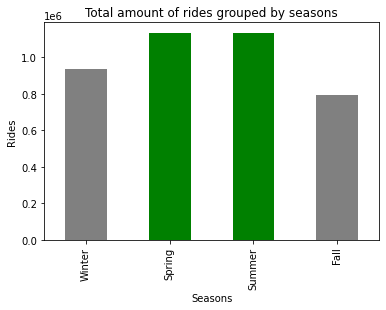

In [52]:
plt.xticks([i * 1 for i in range(0, 4)])
df_all.dropoff_datetime.groupby(by=[(df_all['SEASONN'])]).count().plot(kind="bar",  color=['gray', 'green', 'green', 'gray'], title="Total amount of rides grouped by seasons")
plt.xlabel("Seasons")
plt.ylabel("Rides")

### Let's look at each year separately

### In this line graph, we can see that the hills are again in spring and summer.

Text(0, 0.5, 'Rides')

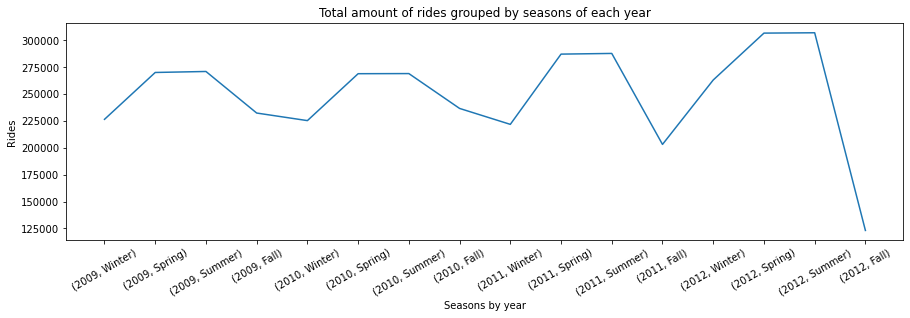

In [53]:
plt.xticks([i * 1 for i in range(0, 16)])
df_all.dropoff_datetime.groupby(by=[(df_all["dropoff_datetime"].dt.year),(df_all['SEASONN'])]).count().plot(figsize=(15, 4),title="Total amount of rides grouped by seasons of each year")
plt.xticks(rotation=30)
plt.xlabel("Seasons by year")
plt.ylabel("Rides")

### When we look at the colored bars on a yearly basis, we can see that the hills are spring and summer.

Text(0, 0.5, 'Rides')

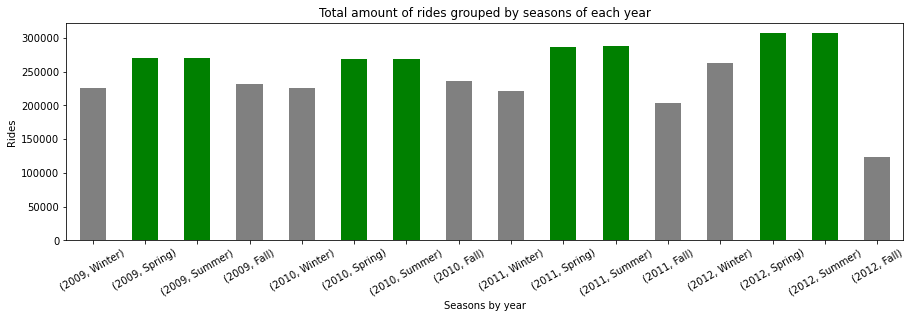

In [54]:
plt.xticks([i * 1 for i in range(0, 16)])
df_all.dropoff_datetime.groupby(by=[(df_all["dropoff_datetime"].dt.year),(df_all['SEASONN'])]).count().plot(figsize=(15, 4), kind="bar",  color=['gray', 'green', 'green', 'gray'],title="Total amount of rides grouped by seasons of each year")
plt.xticks(rotation=30)
plt.xlabel("Seasons by year")
plt.ylabel("Rides")

# ● Make a latitude and longitude map view of pickups and dropoffs in the year 2010

### Since 2010 is requested, we can work with the data set that contains only this which is df2.

In [55]:
df2.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'trip_distance', 'pickup_longitude', 'pickup_latitude', 'rate_code',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'surcharge', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

### Calculation of frame border values.

In [56]:
BBox = ((df2.pickup_longitude.min(), df2.pickup_longitude.max(), df2.pickup_latitude.min(), df2.pickup_latitude.max()))

In [57]:
BBox

(-84.878351, 0.004023, -0.009262, 47.922847)

### Displaying the locations in these borders.

(-0.009262, 47.922847)

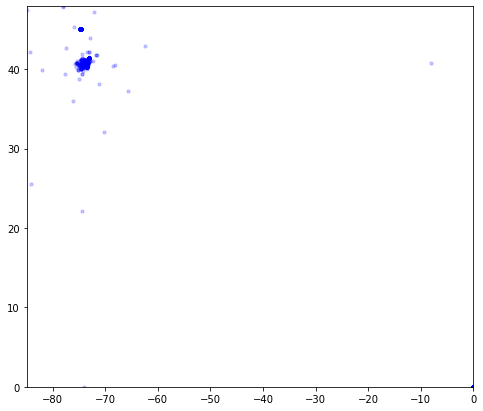

In [58]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df2.pickup_longitude, df2.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

### As can be seen, there are outliers in high deviation in the data.

### Let's clear these outliers.

### Getting location values to a new dataframe.

In [59]:
locv = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [60]:
df_loc=df2[locv]

### Removing some values based on Z scores

In [61]:
z_scores = stats.zscore(df_loc)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3.5).all(axis=1)
new_df = df_loc[filtered_entries]

### Recalculating the borders

In [62]:
BBox2 = ((new_df.pickup_longitude.min(), new_df.pickup_longitude.max(), new_df.pickup_latitude.min(), new_df.pickup_latitude.max()))

(25.569569, 47.922847)

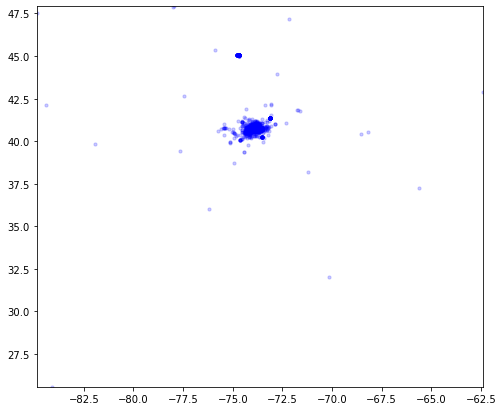

In [63]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(new_df.pickup_longitude, new_df.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_xlim(BBox2[0],BBox2[1])
ax.set_ylim(BBox2[2],BBox2[3])

### There are still outliers. So we need to clean more.

In [64]:
z_scores = stats.zscore(new_df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3.5).all(axis=1)
new_df2 = new_df[filtered_entries]

### Recalculating the borders

In [65]:
BBox3 = ((new_df2.pickup_longitude.min(), new_df2.pickup_longitude.max(), new_df2.pickup_latitude.min(), new_df2.pickup_latitude.max()))

In [66]:
BBox3

(-74.185522, -73.759642, 40.501272, 41.023885)

(40.501272, 41.023885)

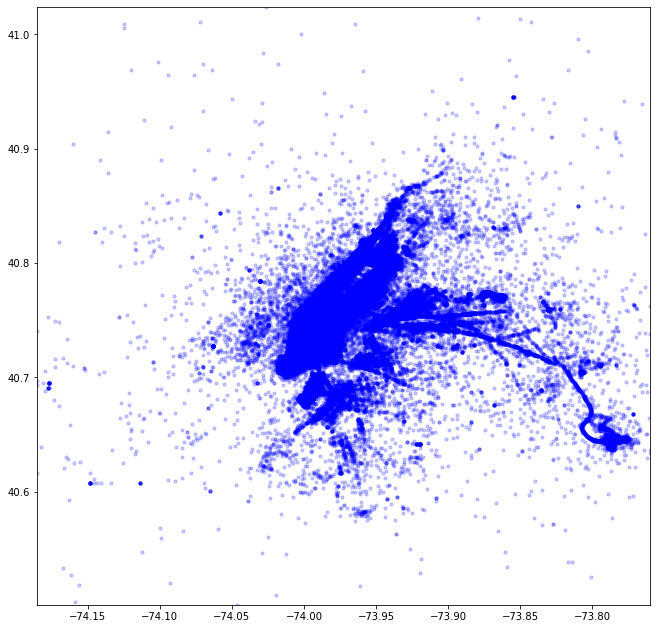

In [67]:
fig, ax = plt.subplots(figsize = (11,11))
ax.scatter(new_df2.pickup_longitude, new_df2.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)

ax.set_xlim(BBox3[0],BBox3[1])
ax.set_ylim(BBox3[2],BBox3[3])

### Finally we got a more meaningful distribution with no that high bias outliers.

### Using the boundary values, a real map can be placed in the substrate.

In [68]:
nymap = plt.imread("../input/nytaxi/MapNY.jpg")

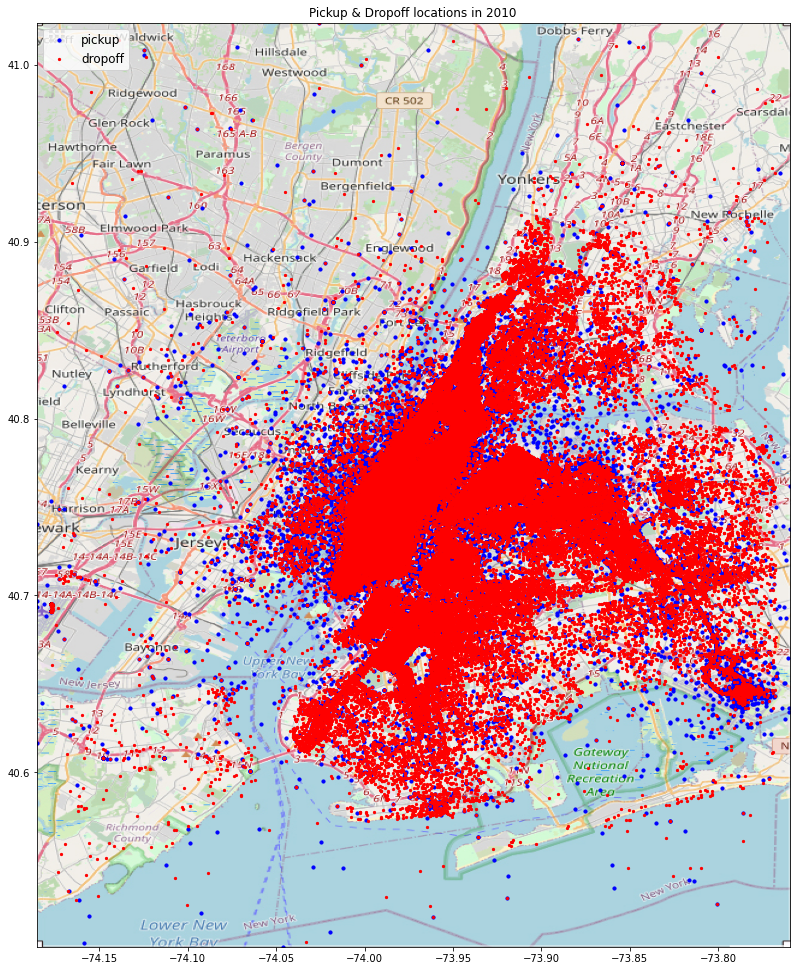

In [69]:
fig, ax = plt.subplots(figsize = (17,17))
ax.scatter(new_df2.pickup_longitude, new_df2.pickup_latitude, zorder=1, alpha= 1.0, c='b', s=10, label="pickup")
ax.scatter(new_df2.dropoff_longitude, new_df2.dropoff_latitude, zorder=1, alpha= 0.99, c='r', s=5, label="dropoff")
ax.set_title('Pickup & Dropoff locations in 2010')
ax.set_xlim(BBox3[0],BBox3[1])
ax.set_ylim(BBox3[2],BBox3[3])

plt.legend(loc='upper left',fontsize='large')


ax.imshow(nymap, zorder=0, extent = BBox3, aspect= 'equal')

### Drop off and pick up points can be viewed on two separate maps

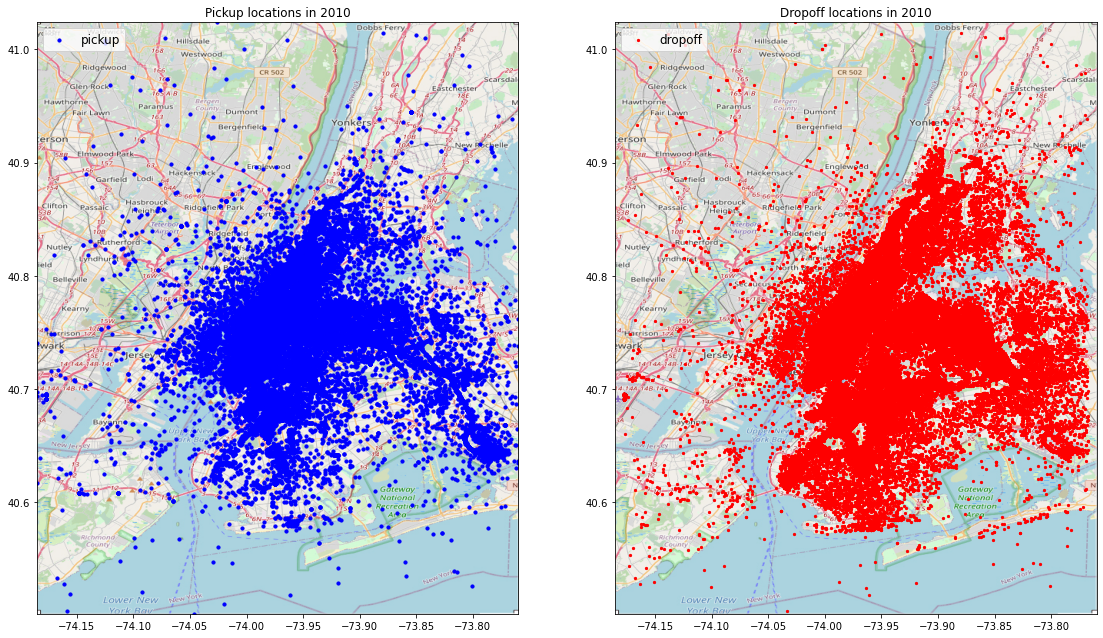

In [70]:
fig, ax = plt.subplots(ncols=2, figsize = (19,19))

ax[0].scatter(new_df2.pickup_longitude, new_df2.pickup_latitude, zorder=1, alpha= 1.0, c='b', s=10, label="pickup")
ax[1].scatter(new_df2.dropoff_longitude, new_df2.dropoff_latitude, zorder=1, alpha= 0.99, c='r', s=5, label="dropoff")

ax[0].set_title('Pickup locations in 2010')
ax[1].set_title('Dropoff locations in 2010')

ax[0].set_xlim(BBox3[0],BBox3[1])
ax[0].set_ylim(BBox3[2],BBox3[3])

ax[0].legend(loc='upper left',fontsize='large')
ax[1].legend(loc='upper left',fontsize='large')

ax[0].imshow(nymap, zorder=0, extent = BBox3, aspect= 'equal')

ax[1].set_xlim(BBox3[0],BBox3[1])
ax[1].set_ylim(BBox3[2],BBox3[3])


ax[1].imshow(nymap, zorder=0, extent = BBox3, aspect= 'equal')


# ● Find what the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations

### Getting location values to a new dataframe.

In [71]:
loca = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','fare_amount','tolls_amount']

In [72]:
df_loc_all=df_all[loca]

### Clearing outliers.

### Removing some values based on Z scores

In [73]:
z_scores = stats.zscore(df_loc_all)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3.5).all(axis=1)
new_dfa = df_loc_all[filtered_entries]

z_scores = stats.zscore(new_dfa)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3.5).all(axis=1)
new_dfa2 = new_dfa[filtered_entries]

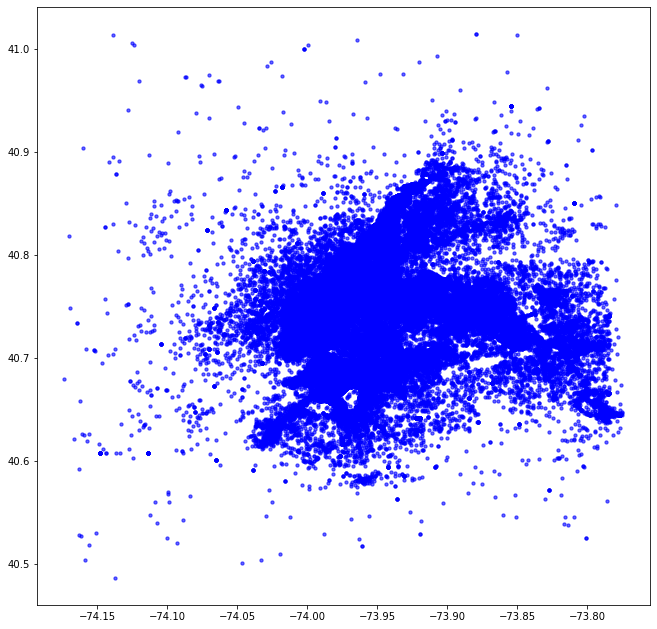

In [74]:
fig, ax = plt.subplots(figsize = (11,11))
ax.scatter(new_dfa2.pickup_longitude, new_dfa2.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.scatter(new_dfa2.dropoff_longitude, new_dfa2.dropoff_latitude, zorder=1, alpha= 0.2, c='b', s=10)

### Outliers look quite cleared

### Looking at cleared data

In [75]:
new_dfa2

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,tolls_amount
0,-74.004114,40.742950,-73.994712,40.747950,5.4,0.0
1,-73.996506,40.747784,-73.940449,40.792385,15.4,0.0
2,-73.948288,40.774511,-73.997466,40.718039,18.7,0.0
3,-73.992710,40.743155,-74.002378,40.747020,4.9,0.0
4,-73.990926,40.751590,-73.992199,40.738818,5.3,0.0
...,...,...,...,...,...,...
3999995,-73.974433,40.791116,-73.968463,40.799206,4.1,0.0
3999996,-73.982440,40.742910,-73.954648,40.787885,10.9,0.0
3999997,-73.982440,40.742910,-73.954648,40.787885,10.9,0.0
3999998,-73.982440,40.742910,-73.954648,40.787885,10.9,0.0


### Determination for features

### New feature for the fare amount (inclusive of tolls)

In [76]:
new_dfa2['fare_and_tolls_amount']=new_dfa2.fare_amount+new_dfa2.tolls_amount

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### New feature for the distance between pick and drop longitudes

In [77]:
new_dfa2['longtitude_distance']=abs(new_dfa2.dropoff_longitude-new_dfa2.pickup_longitude)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### New feature for the distance between pick and drop latitudes

In [78]:
new_dfa2['latitude_distance']=abs(new_dfa2.dropoff_latitude-new_dfa2.pickup_latitude)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### This hypotenuse value, which gives the air distance between pickup and dropoff locations, will help the model to make it more accurate.

In [79]:
import math
new_dfa2['hypotenuse']=np.sqrt((new_dfa2['longtitude_distance']**2)+(new_dfa2['latitude_distance']**2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Determination of dependent and independent variables. 

In [80]:
X = new_dfa2[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','longtitude_distance','latitude_distance','hypotenuse']].values
y = new_dfa2['fare_and_tolls_amount'].values

### The division of data into two to train and test the model.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### importing sklearn for machine learning

In [82]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 

### Creating a linear regression model with train data of dependent and independent variables

In [83]:
from sklearn.linear_model import LinearRegression

r = LinearRegression()
r.fit(X_train, y_train)

LinearRegression()

### Accuracy of the model based on r^2 score

In [84]:
print("Test set R^2 score is: {:.2f}".format(r.score(X_test, y_test)))

Test set R^2 score is: 0.78


### Accuracy of the model based on cross validation score

In [85]:
from sklearn.model_selection import cross_val_score

cross_val_score(r, X_test, y_test, cv=3).mean()

0.7825440613969269

### 78% is a good enough score

### Creating the estimation function.

In [86]:
def predictor(pickup_longitudeX, pickup_latitudeX, dropoff_longitudeX, dropoff_latitudeX):
    lodi=abs(pickup_longitudeX-dropoff_longitudeX)
    ladi=abs(pickup_latitudeX-dropoff_latitudeX)
    hypo=math.sqrt((lodi**2)+(ladi**2))
    
    ar=np.array([[pickup_longitudeX, pickup_latitudeX, dropoff_longitudeX, dropoff_latitudeX, lodi, ladi, hypo]])
    return print("Estimated fare is: ${:.2f}".format(r.predict(ar)[0]))

#### For being realistic:
#### longtitutes should be between -74.18 and -73.75,
#### Latitutes should be between 40.50 and 41.02

### This is the predictor.

In [87]:
#predictor(pickup_longitudeX, pickup_latitudeX, dropoff_longitudeX, dropoff_latitudeX):

In [88]:
predictor(-74, 41,-74, 41)

Estimated fare is: $1.87


In [89]:
predictor(-74, 41,-74, 41.2)

Estimated fare is: $42.39


In [90]:
predictor(-73.948288,40.774511,-73.997466,40.718039)

Estimated fare is: $16.51


### This is the predictor.

# ● Create assumptions, validate against a data and prove with storyelling and graphs

### Assumption: There is less rides at night than during the day.

### Determining the day and night according to the hours of the day.

In [91]:
during_day = df_all.dropoff_datetime.where((df_all["dropoff_datetime"].dt.hour>18)|(df_all["dropoff_datetime"].dt.hour<6)).dropna()

In [92]:
during_night = df_all.dropoff_datetime.where((df_all["dropoff_datetime"].dt.hour<=18)|(df_all["dropoff_datetime"].dt.hour>=6)).dropna()

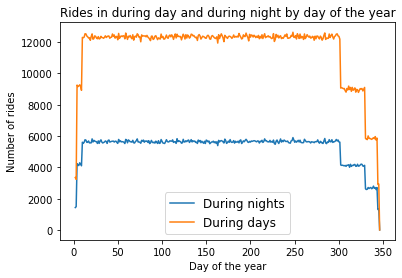

In [93]:
during_day.groupby(df_all["dropoff_datetime"].dt.dayofyear).count().plot(kind="line",title ='Rides in during day and during night by day of the year', label="During nights")
during_night.groupby(df_all["dropoff_datetime"].dt.dayofyear).count().plot(kind="line", label="During days")
plt.xlabel("Day of the year")
plt.ylabel("Number of rides")
plt.legend(loc='lower center',fontsize='large')


### The graph clearly shows that the number of rides at night (from 18:00 to 06:00) is much less than during the day.